# Importing libraries and data

In [30]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
india_shapefile = 'indian_map/indian_states.shp'
gdf = gpd.read_file(india_shapefile)

data = pd.read_csv('data/Data.csv')
state_data = pd.read_csv('data/State_data.csv')
ncap_funding = pd.read_csv('data/NCAP_Funding.csv')


# Spatial aggregation

## 1

In [5]:
state_pm = data.groupby("state")["PM2.5"].mean().sort_values(ascending = False)
print(f"The state with highest average PM2.5 is {state_pm.index[1]} with {state_pm.iloc[1]}")

The state with highest average PM2.5 is Bihar with 76.9187585286517


## 2

In [6]:

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['year'] = data['Timestamp'].dt.year
data['date'] = data['Timestamp'].dt.date

state_hazardous = data[(data['PM2.5'] > 300) & (data['year'] == 2023)]
state_hazardous_days = state_hazardous.groupby(['state', 'date'])['PM2.5'].count().reset_index()
state_hazardous_count = state_hazardous_days.groupby('state')['date'].count().sort_values(ascending = False)

print(f"The state with most days with hazardous PM2.5 levels in 2023 is {state_hazardous_count.index[0]} with {state_hazardous_count.iloc[0]} days")

The state with most days with hazardous PM2.5 levels in 2023 is Delhi with 49 days


## 3

In [7]:

# Filter data for the year 2023
data_2023 = data[data['year'] == 2023]

# Calculate standard deviation of PM2.5 levels for each state
state_variability = data_2023.groupby('state')['PM2.5'].std()

# Sort states by variability in descending order
state_variability = state_variability.sort_values(ascending=False)

# Retrieve the state with the highest variability
highest_variability_state = state_variability.idxmax()
highest_variability_value = state_variability.max()

print(f"The state with the highest variability in PM2.5 levels across monitoring stations in 2023 is {highest_variability_state} with a standard deviation of {highest_variability_value:.2f}")

The state with the highest variability in PM2.5 levels across monitoring stations in 2023 is Delhi with a standard deviation of 82.80


## 4

In [8]:

data_2020_2021 = data[data['year'].isin([2020, 2021])]

# Compute the average PM2.5 levels for each state
state_avg_pm25 = data_2020_2021.groupby('state')['PM2.5'].mean()

# Sort states by average PM2.5 levels in ascending order
state_avg_pm25 = state_avg_pm25.sort_values()

# Retrieve the state with the lowest average PM2.5 levels
lowest_pm_state = state_avg_pm25.idxmin()
lowest_pm_value = state_avg_pm25.min()
print(f"The state with the lowest average PM2.5 levels during COVID (2020-2021) is {lowest_pm_state} with a value of {lowest_pm_value:.2f}")


The state with the lowest average PM2.5 levels during COVID (2020-2021) is Mizoram with a value of 14.32


# Temporal Aggregation

## 1

In [9]:

data_2020 = data[data["year"] == 2020]
aug_2020 = data_2020[data_2020["Timestamp"].dt.month == 8]    # using dt function to extract month from timestamp and then filtering for August
aug_2020_max = aug_2020.groupby("state")["PM2.5"].max().sort_values(ascending = False)

print(f"The state with highest PM2.5 levels in August 2020 is {aug_2020_max.index[0]} with {aug_2020_max.iloc[0]}")

The state with highest PM2.5 levels in August 2020 is Karnataka with 805.51


## 2

In [11]:


data_2018 = data[data["year"] == 2018].copy()
data_2018['month'] = data_2018['Timestamp'].dt.month

# Assign seasons based on the month
data_2018['season'] = data_2018['month'].apply(
    lambda x: 'Winter' if x in [12, 1, 2]
    else ('Summer' if x in [3, 4, 5]
    else 'Monsoon')
)

# Filter data for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB monitoring station
lal_bahadur = data_2018[data_2018['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']

# Compute the average PM2.5 levels for each season
season_pm = lal_bahadur.groupby('season')['PM2.5'].mean().sort_values(ascending=False)

# Retrieve the season with the highest PM2.5 levels
highest_pm_season = season_pm.idxmax()
highest_pm_value = season_pm.max()


print(season_pm)
print(f"The season with the highest average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is {highest_pm_season} with a value of {highest_pm_value:.2f}.")

# Possible reasons for seasonal variations in air pollution:
#  Weather conditions: Some seasons have atmospheric conditions that trap pollutants, increasing pollution levels.
#  Agricultural activities: Monsoon season often sees more pollution due to agricultural activities like crop burning, which releases pollutants into the air.


season
Winter     67.492344
Monsoon    42.887399
Summer           NaN
Name: PM2.5, dtype: float64
The season with the highest average PM2.5 concentration in 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB is Winter with a value of 67.49.


## 3

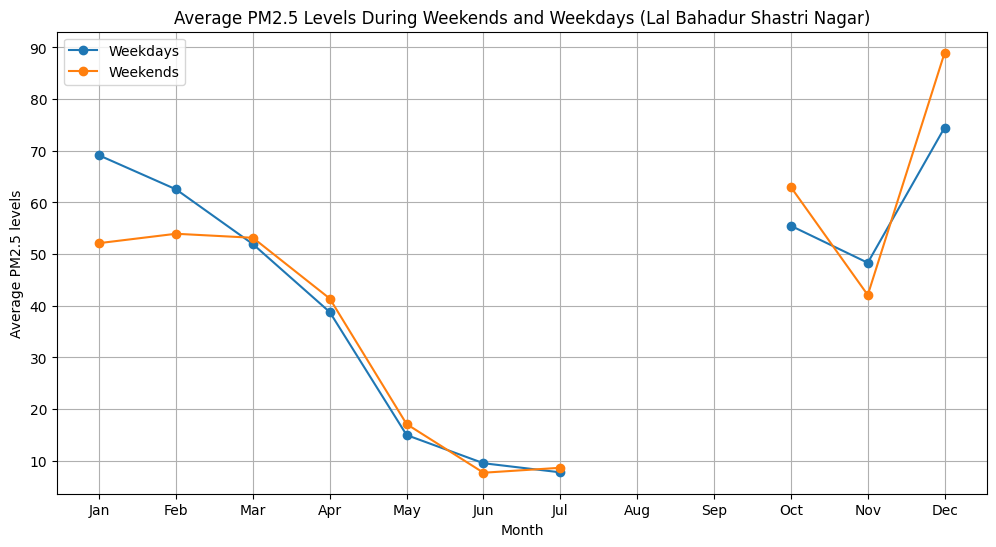

In [12]:

data_2021 = data[data['year'] == 2021].copy()

data_2021['day_of_week'] = data_2021['Timestamp'].dt.dayofweek
data_2021['month'] = data_2021['Timestamp'].dt.month

data_2021['weekend'] = data_2021['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)
data_2021['weekdays'] = 1 - data_2021['weekend']

lal_bahadur_2021 = data_2021[data_2021['station'] == 'Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'].copy()
monthly_pm = lal_bahadur_2021.groupby(['month', 'weekend'])['PM2.5'].mean().unstack()  # using unstack() to create separate columns for weekdays and weekend to compare them easily.

monthly_pm.plot(kind = 'line', figsize = (12, 6), marker = 'o')

plt.xlabel('Month')
plt.ylabel('Average PM2.5 levels')
plt.title('Average PM2.5 Levels During Weekends and Weekdays (Lal Bahadur Shastri Nagar)')
plt.xticks(ticks = range(1, 13), labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(['Weekdays', 'Weekends'])
plt.grid(True)
plt.show()

# Spatio-temporal aggregation

# Population-Based

## 1

In [13]:

no_of_stations = data.groupby('state')['station'].nunique()
state_population = state_data.set_index('State')['Population']
station_relative_population = no_of_stations / state_population

print(f"State with the highest number of monitoring stations relative to its population is {station_relative_population.idxmax()}")

State with the highest number of monitoring stations relative to its population is Chandigarh


## 2

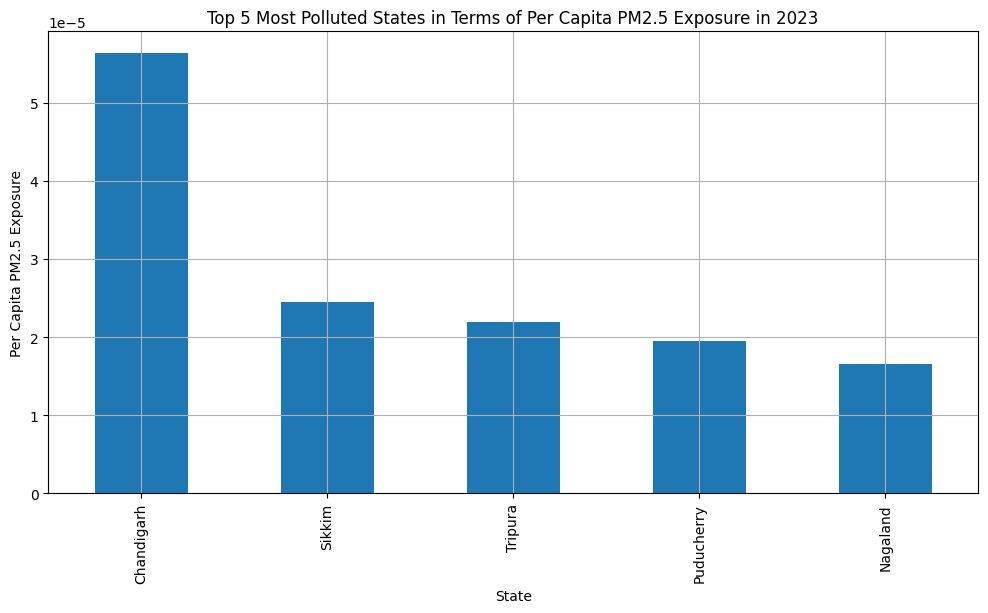

In [14]:
import matplotlib.pyplot as plt

data_2023 = data[data['year'] == 2023]
pm2_23 = data_2023.groupby('state')['PM2.5'].mean().sort_values(ascending = False)
exposure_per_capita = pm2_23/state_population
top_5 = exposure_per_capita.nlargest(5)

top_5.plot(kind = 'bar', figsize = (12, 6))
plt.xlabel('State')
plt.ylabel('Per Capita PM2.5 Exposure')
plt.title('Top 5 Most Polluted States in Terms of Per Capita PM2.5 Exposure in 2023')
plt.grid(True)
plt.show()

## 3

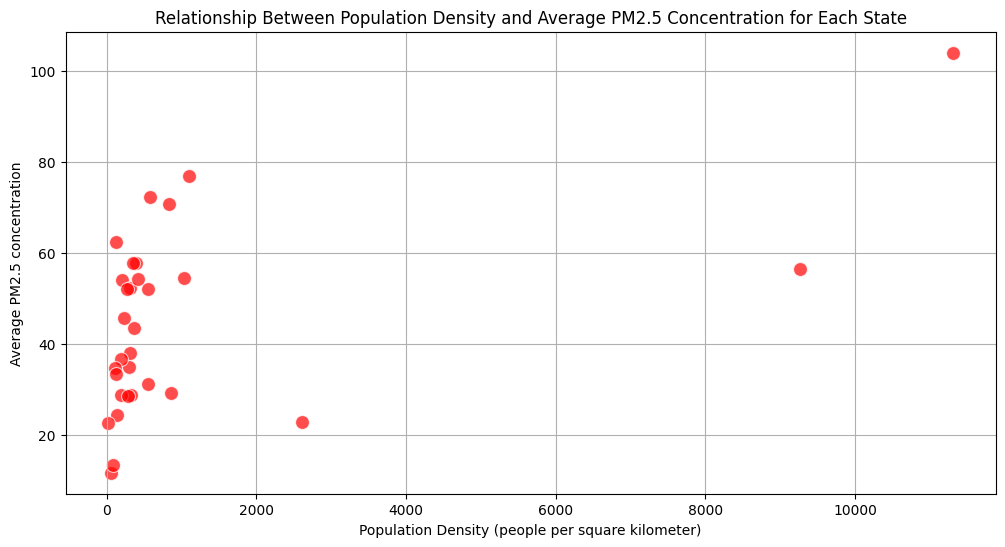

In [15]:
population_density = state_data['Population'] / state_data['Area (km2)']

state_pm = data.groupby('state')['PM2.5'].mean()

state_data['Population Density'] = population_density

state_data = state_data.merge(state_pm, left_on='State', right_on='state')


plt.figure(figsize=(12, 6))
sns.scatterplot(x = 'Population Density', y = 'PM2.5', data = state_data, s = 100, alpha = 0.7, color = 'red')
plt.xlabel('Population Density (people per square kilometer)')
plt.ylabel('Average PM2.5 concentration')
plt.title('Relationship Between Population Density and Average PM2.5 Concentration for Each State')
plt.grid(True)
plt.show()

# Area Based

## 1

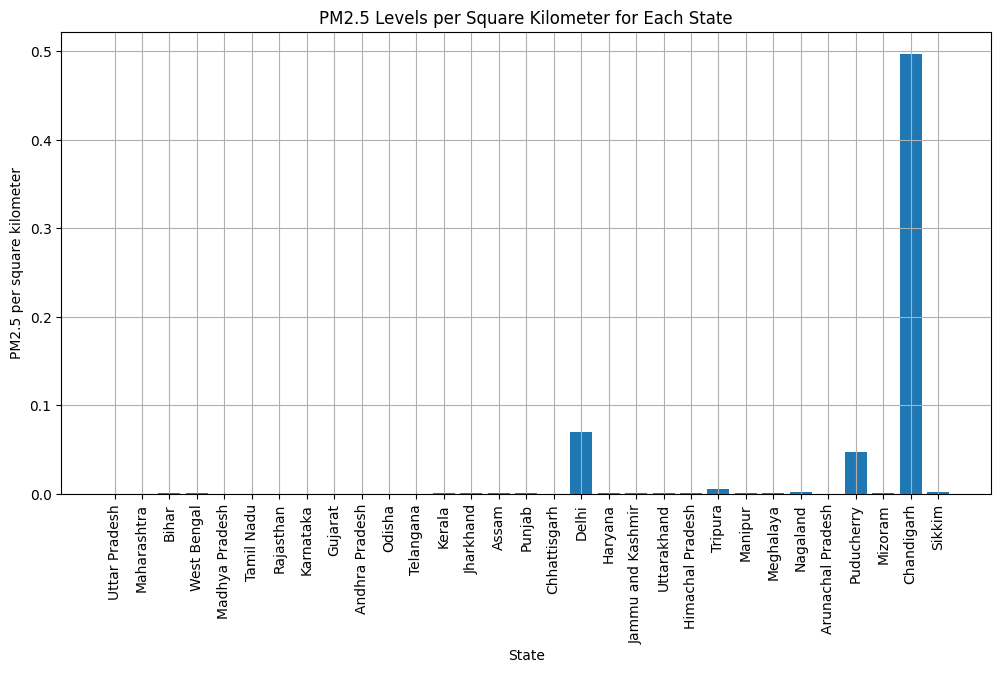

State with the highest PM2.5 levels per square kilometer is Chandigarh


In [16]:
pm_per_sqr_km = state_data['PM2.5'] / state_data['Area (km2)']

plt.figure(figsize=(12, 6))
plt.bar(state_data['State'], pm_per_sqr_km)
plt.xlabel('State')
plt.ylabel('PM2.5 per square kilometer')
plt.title('PM2.5 Levels per Square Kilometer for Each State')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

print(f"State with the highest PM2.5 levels per square kilometer is {state_data['State'][pm_per_sqr_km.idxmax()]}")

## 2

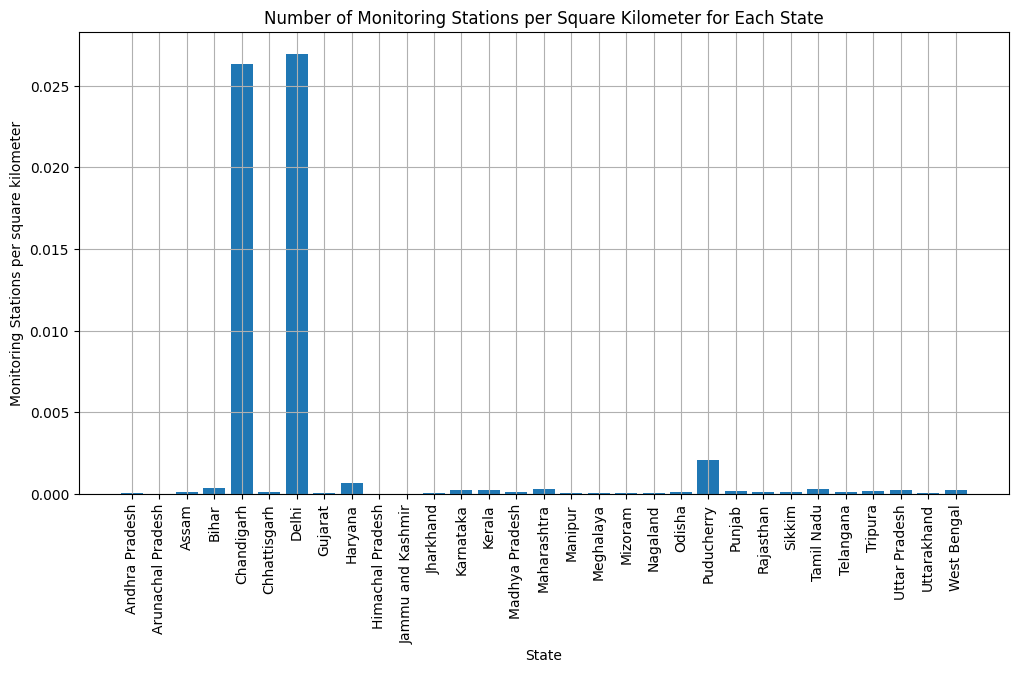

State with the highest number of monitoring stations per square kilometer is Delhi


In [17]:
station_per_km = no_of_stations / state_data.set_index('State')['Area (km2)']


plt.figure(figsize=(12, 6))
plt.bar(station_per_km.index, station_per_km)

plt.xlabel('State')
plt.ylabel('Monitoring Stations per square kilometer')
plt.title('Number of Monitoring Stations per Square Kilometer for Each State')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

print(f"State with the highest number of monitoring stations per square kilometer is {station_per_km.idxmax()}")

## 3

In [18]:
maharashtra_pm_2021 = data_2021[data_2021['state'] == 'Maharashtra']['PM2.5'].mean()
madhya_pradesh_pm_2021 = data_2021[data_2021['state'] == 'Madhya Pradesh']['PM2.5'].mean()

print(f"Maharashtra had an average PM2.5 concentration of {maharashtra_pm_2021} in 2021")
print(f"Madhya Pradesh had an average PM2.5 concentration of {madhya_pradesh_pm_2021} in 2021")

Maharashtra had an average PM2.5 concentration of 46.44004417107665 in 2021
Madhya Pradesh had an average PM2.5 concentration of 47.095951831498965 in 2021


# Funding Based

## 1

/var/folders/jt/yrxmbcl578qgr0z_vb6ztnkr0000gn/T/ipykernel_71403/3753160796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ncap_funding_2021['Amount released during FY 2020-21'] = pd.to_numeric(ncap_funding_2021['Amount released during FY 2020-21'], errors='coerce')


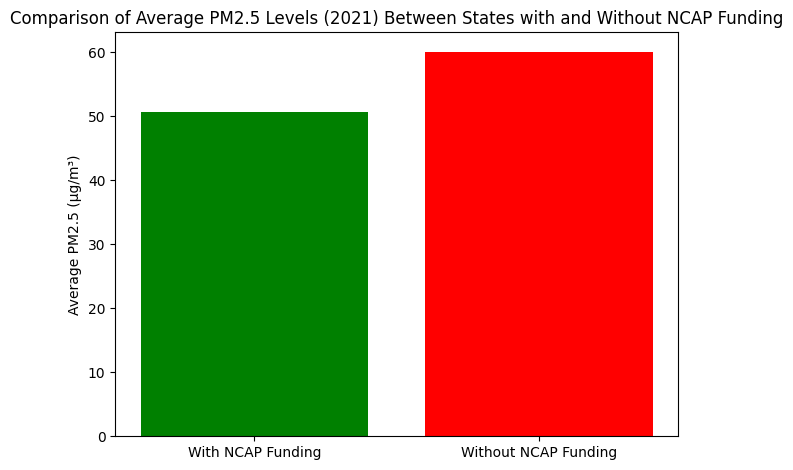

In [19]:
# Step 1: Convert the funding data to numeric and handle '--' as NaN
ncap_funding_2021 = ncap_funding[['State', 'Amount released during FY 2020-21']]
ncap_funding_2021['Amount released during FY 2020-21'] = pd.to_numeric(ncap_funding_2021['Amount released during FY 2020-21'], errors='coerce')

# States with funding (Amount > 0, excluding NaN)
states_with_funding = ncap_funding_2021[ncap_funding_2021['Amount released during FY 2020-21'].notna()]['State'].tolist()

# States without funding (Amount is NaN or invalid)
states_without_funding = ncap_funding_2021[ncap_funding_2021['Amount released during FY 2020-21'].isna()]['State'].tolist()

# Step 2: Calculate average PM2.5 levels for each group
# Filter data for states with and without funding
states_with_funding_data = data[data['state'].isin(states_with_funding)]
states_without_funding_data = data[data['state'].isin(states_without_funding)]

# Calculate average PM2.5
avg_pm25_with_funding = states_with_funding_data['PM2.5'].mean()
avg_pm25_without_funding = states_without_funding_data['PM2.5'].mean()

# Step 3: Plot comparison
labels = ['With NCAP Funding', 'Without NCAP Funding']
avg_pm25_values = [avg_pm25_with_funding, avg_pm25_without_funding]

plt.bar(labels, avg_pm25_values, color=['green', 'red'])
plt.ylabel('Average PM2.5 (µg/m³)')
plt.title('Comparison of Average PM2.5 Levels (2021) Between States with and Without NCAP Funding')
plt.tight_layout()
plt.show()


## 2

/var/folders/jt/yrxmbcl578qgr0z_vb6ztnkr0000gn/T/ipykernel_71403/822169962.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  assam_data['Year'] = pd.to_datetime(assam_data['Timestamp']).dt.year


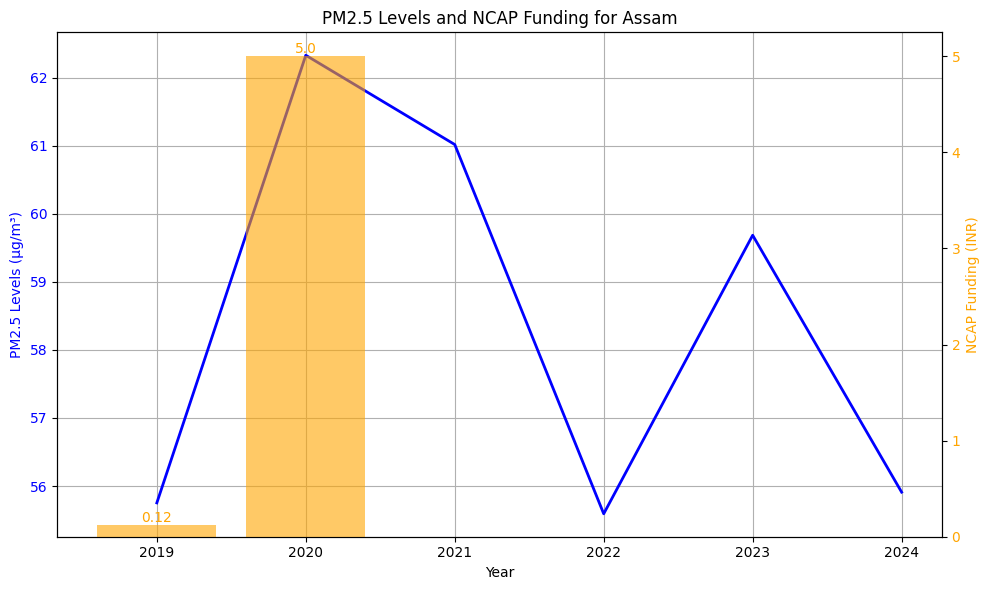

In [20]:
ncap_funding['Amount released during FY 2019-20'] = pd.to_numeric(ncap_funding['Amount released during FY 2019-20'], errors='coerce')
ncap_funding['Amount released during FY 2020-21'] = pd.to_numeric(ncap_funding['Amount released during FY 2020-21'], errors='coerce')

# Filter the data for Assam
assam_data = data[data['state'] == 'Assam']

# Extract the funding for Assam
assam_funding = ncap_funding[['State', 'Amount released during FY 2019-20', 'Amount released during FY 2020-21']]
assam_funding_data = assam_funding[assam_funding['State'] == 'Assam']

# Step 1: Calculate yearly average PM2.5 levels
assam_data['Year'] = pd.to_datetime(assam_data['Timestamp']).dt.year
yearly_pm25 = assam_data.groupby('Year')['PM2.5'].mean().reset_index()

# Step 2: Prepare the funding data by year (We will use funding from FY 2020-21)
# Assuming we consider FY 2020-21 as the year 2020 for this analysis
funding_data = {
    'Year': [2019, 2020],
    'Funding': [assam_funding_data['Amount released during FY 2019-20'].values[0], 
                assam_funding_data['Amount released during FY 2020-21'].values[0]]
}
funding_df = pd.DataFrame(funding_data)

# Step 3: Plot the time series graph with dual-axis (Funding and PM2.5)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the PM2.5 levels
ax1.plot(yearly_pm25['Year'], yearly_pm25['PM2.5'], color='blue', label='PM2.5 Levels', linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('PM2.5 Levels (µg/m³)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('PM2.5 Levels and NCAP Funding for Assam')

# Create a second y-axis for the funding
ax2 = ax1.twinx()
ax2.bar(funding_df['Year'], funding_df['Funding'], color='orange', alpha=0.6, label='NCAP Funding')
ax2.set_ylabel('NCAP Funding (INR)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add annotations to highlight funding years
for i, row in funding_df.iterrows():
    ax2.text(row['Year'], row['Funding'], f'{row["Funding"]}', color='orange', ha='center', va='bottom')

# Add a grid to the background
ax1.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


## 2

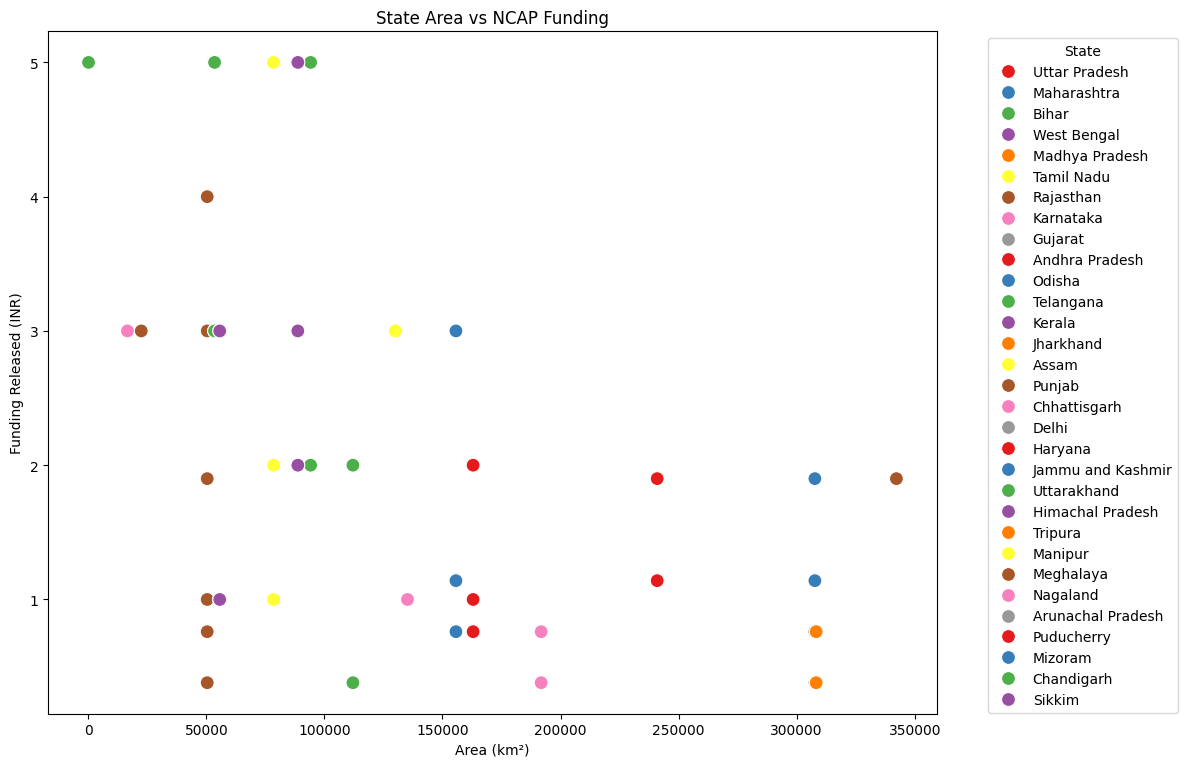

In [21]:
ncap_funding['Amount released during FY 2020-21'] = pd.to_numeric(ncap_funding['Amount released during FY 2020-21'], errors='coerce')

# Step 1: Merge funding data with the state data
merged_data = pd.merge(state_data, ncap_funding, on='State', how='left')

# Step 2: Plot scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=merged_data, x='Area (km2)', y='Amount released during FY 2020-21', hue='State', palette='Set1', s=100)

# Add labels and title
plt.xlabel('Area (km²)')
plt.ylabel('Funding Released (INR)')
plt.title('State Area vs NCAP Funding')

# Move legend outside the plot
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# Miscellaneous Questions

## 1

In [22]:
# Filter the data for the year 2023
data_2023 = data[data['Timestamp'].dt.year == 2023]

# Calculate the average PM2.5 levels for each city
city_pollution = data_2023.groupby('city')['PM2.5'].mean()

# Find the city with the highest average PM2.5 level
most_polluted_city = city_pollution.idxmax()

hazardous_threshold = 300
days_above_threshold = data_2023[(data_2023['city'] == most_polluted_city) & (data_2023['PM2.5'] > hazardous_threshold)]

# Calculate the percentage
total_days = len(data_2023[data_2023['city'] == most_polluted_city])
percentage_above_threshold = (len(days_above_threshold) / total_days) * 100

print(f"City: {most_polluted_city}")
print(f"Percentage of days with PM2.5 levels above the threshold: {percentage_above_threshold:.2f}%")

City: Darbhanga
Percentage of days with PM2.5 levels above the threshold: 0.82%


## 2

/var/folders/jt/yrxmbcl578qgr0z_vb6ztnkr0000gn/T/ipykernel_71403/1559385390.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Month'] = delhi_data['Timestamp'].dt.month
/var/folders/jt/yrxmbcl578qgr0z_vb6ztnkr0000gn/T/ipykernel_71403/1559385390.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delhi_data['Year'] = delhi_data['Timestamp'].dt.year


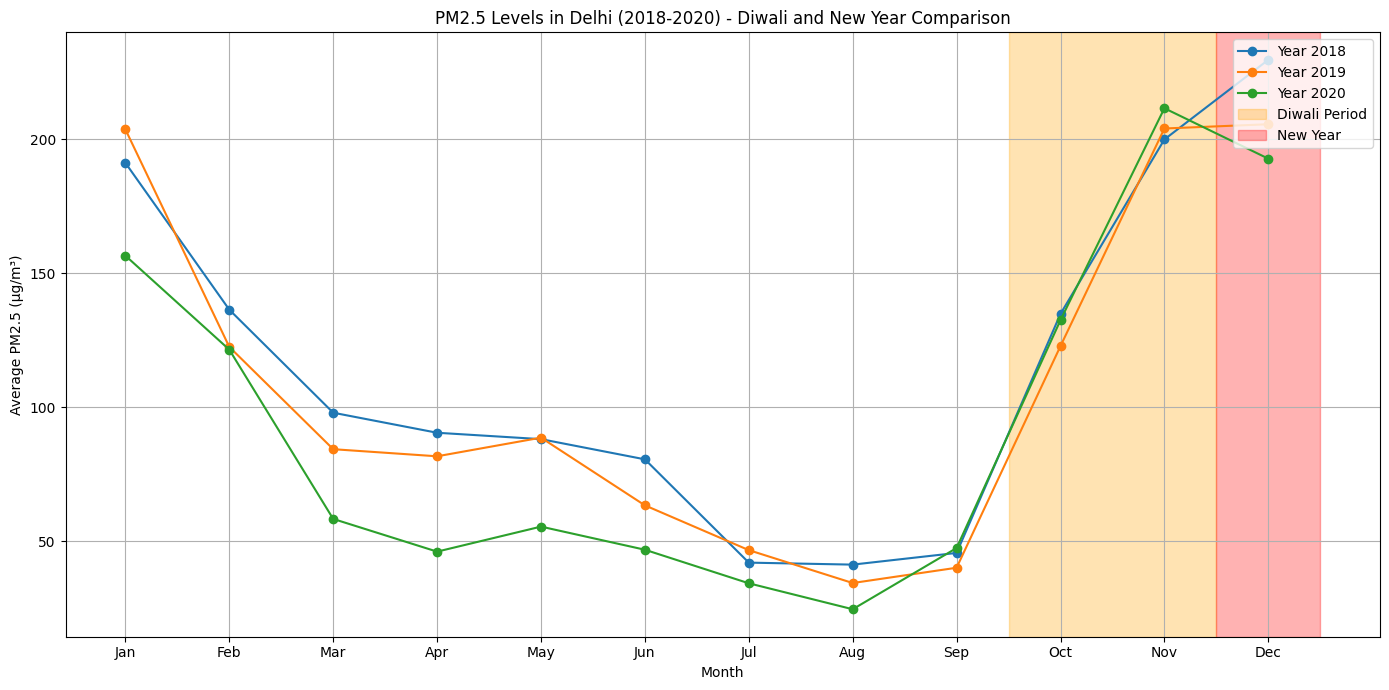

In [23]:
# Filter data for Delhi and for the years 2018-2020
delhi_data = data[(data['city'] == 'Delhi') & (data['Timestamp'].dt.year.isin([2018, 2019, 2020]))]

# Create a new column for Month and Year
delhi_data['Month'] = delhi_data['Timestamp'].dt.month
delhi_data['Year'] = delhi_data['Timestamp'].dt.year

# Calculate the average PM2.5 per month for each year
monthly_avg_pm25 = delhi_data.groupby(['Year', 'Month'])['PM2.5'].mean().reset_index()

# Plot PM2.5 levels for each month over the years
plt.figure(figsize=(14, 7))

# Plotting the data for all three years
for year in [2018, 2019, 2020]:
    yearly_data = monthly_avg_pm25[monthly_avg_pm25['Year'] == year]
    plt.plot(yearly_data['Month'], yearly_data['PM2.5'], marker='o', label=f'Year {year}')

# Highlight the Diwali (October-November) and New Year periods (December 31 - January 1)
diwali_start = 10  # October
diwali_end = 11    # November
new_year_start = 12  # December (New Year)

# Shading Diwali period (October-November)
plt.axvspan(diwali_start - 0.5, diwali_end + 0.5, color='orange', alpha=0.3, label='Diwali Period')

# Shading New Year period (December)
plt.axvspan(new_year_start - 0.5, new_year_start + 0.5, color='red', alpha=0.3, label='New Year')

# Set labels, title, and legend
plt.title('PM2.5 Levels in Delhi (2018-2020) - Diwali and New Year Comparison')
plt.xlabel('Month')
plt.ylabel('Average PM2.5 (µg/m³)')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


## 3

State with the highest NCAP funding in 2020: Assam


/var/folders/jt/yrxmbcl578qgr0z_vb6ztnkr0000gn/T/ipykernel_71403/1277163454.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Timestamp'] = pd.to_datetime(state_data['Timestamp'])
/var/folders/jt/yrxmbcl578qgr0z_vb6ztnkr0000gn/T/ipykernel_71403/1277163454.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_data['Year'] = state_data['Timestamp'].dt.year


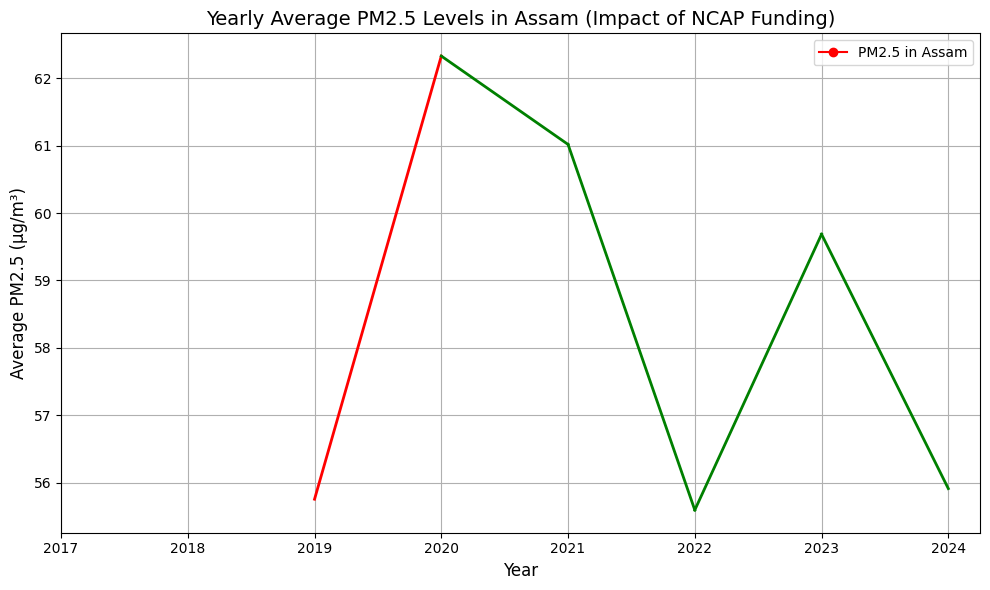

In [24]:
# Step 1: Identify the state with the highest NCAP funding in 2020
# Filter out the relevant columns for 2020
ncap_funding_2020 = ncap_funding[['State', 'Amount released during FY 2020-21']]

# Find the state with the maximum amount of funding
max_funding_state = ncap_funding_2020.loc[ncap_funding_2020['Amount released during FY 2020-21'].idxmax()]

print(f"State with the highest NCAP funding in 2020: {max_funding_state['State']}")

# Step 2: Filter data for the state with the highest NCAP funding
state_name = max_funding_state['State']
state_data = data[data['state'] == state_name]

# Convert 'Timestamp' to datetime
state_data['Timestamp'] = pd.to_datetime(state_data['Timestamp'])

# Step 3: Calculate yearly average PM2.5 levels for this state
state_data['Year'] = state_data['Timestamp'].dt.year

# Group by year and calculate the average PM2.5 for each year
yearly_avg_pm25 = state_data.groupby('Year')['PM2.5'].mean().reset_index()

# Step 4: Color coding for pre-2020 (red) and 2020 onwards (green)
# Any year before 2020 (including 2019) will be red, and 2020+ will be green
yearly_avg_pm25['Color'] = yearly_avg_pm25['Year'].apply(lambda x: 'red' if x <= 2020 else 'green')

# Step 5: Plot the yearly average PM2.5 levels with color coding
plt.figure(figsize=(10, 6))

# Plotting the segments for pre-2020 (red) and post-2020 (green)
for i in range(1, len(yearly_avg_pm25)):
    plt.plot(yearly_avg_pm25['Year'].iloc[i-1:i+1], yearly_avg_pm25['PM2.5'].iloc[i-1:i+1],
             color=yearly_avg_pm25['Color'].iloc[i], lw=2)

# Plot the first point (to avoid missing plot due to range starting from index 1)
plt.plot(yearly_avg_pm25['Year'].iloc[0], yearly_avg_pm25['PM2.5'].iloc[0], 
         marker='o', color=yearly_avg_pm25['Color'].iloc[0], label=f'PM2.5 in {state_name}')

# Labels and title
plt.title(f'Yearly Average PM2.5 Levels in {state_name} (Impact of NCAP Funding)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average PM2.5 (µg/m³)', fontsize=12)
plt.grid(True)
plt.xticks(yearly_avg_pm25['Year'])
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


## 4

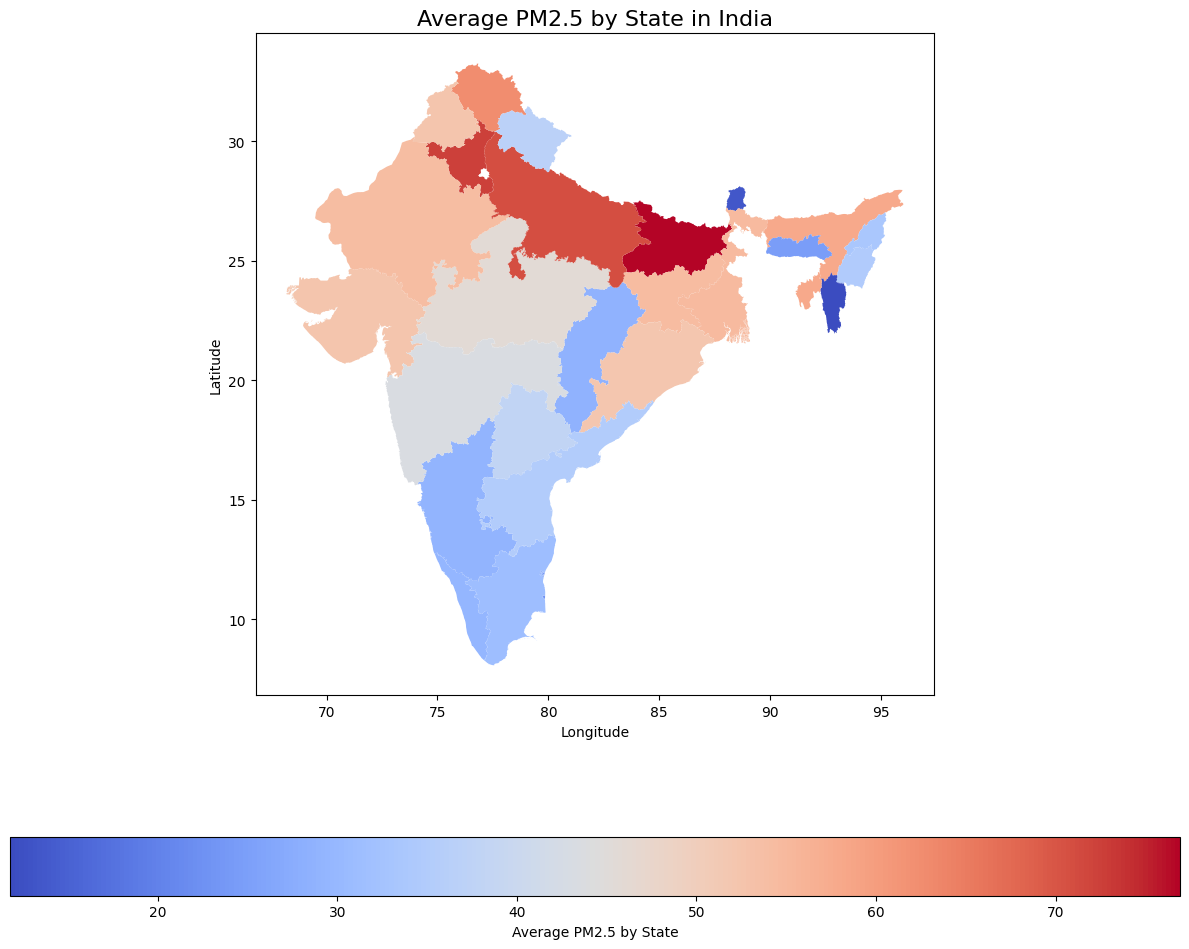

In [32]:
# Load the shapefile for Indian states
gdf = gpd.read_file(india_shapefile)


# Step 1: Calculate average PM2.5 by state
# You might want to get an aggregate of PM2.5 per state
state_avg_pm25 = data.groupby('state')['PM2.5'].mean().reset_index()

# Step 2: Merge the state average PM2.5 data with the shapefile GeoDataFrame
# Make sure your state names are correctly aligned between the shapefile and your dataset
gdf = gdf.merge(state_avg_pm25, how="left", left_on="st_nm", right_on="state")

# Step 3: Plot the map with color-coding based on the PM2.5 levels
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Plot the map with color-coding based on PM2.5 levels
gdf.plot(column='PM2.5', ax=ax, legend=True,
         legend_kwds={'label': "Average PM2.5 by State",
                      'orientation': "horizontal"},
         cmap='coolwarm')

# Add title and labels
plt.title('Average PM2.5 by State in India', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.tight_layout()
plt.show()


# Tell us something new

What we observed is that the fundings provided by NCAP were very abrupt; in the sense that a city with very less funding would get enourmous funding in the next year and the opposite would also happen in many cases. This should not happen as one time investment can show immediate effects, but may not be sustainable in long run for funding agency as well as the cities receiving the funding.

Also, it's rather odd that for a large portion of cities in the same state, the amount of funds utilized would be same even though different amount of fundings were provided to them and these cities definitely have different population, pollution amounts and other external factors affecting the data.